<a href="https://colab.research.google.com/github/itqop/opencv/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22object_detection_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Устанавливаем версию 1.x по умолчанию    


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.



Клонируем репозиторий TensorFlow Models:    


In [ ]:
!git clone https://github.com/tensorflow/models.git                                                 

Cloning into 'models'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 45403 (delta 40), reused 53 (delta 5), pack-reused 45315
Receiving objects: 100% (45403/45403), 550.88 MiB | 38.10 MiB/s, done.
Resolving deltas: 100% (31056/31056), done.


Устанавливаем protobuf и компилируем необходимые файлы  в object_detection:


In [ ]:
!apt-get -qq install libprotobuf-java protobuf-compiler                                                
%cd ./models/research/
!protoc object_detection/protos/*.proto --python_out=.
%cd ../.. 

/content/models/research
/content


 Добавляем необходимые пути в переменную окружения PYTHONPATH:



In [ ]:
import os

os.environ['PYTHONPATH'] += ":/content/models/research/"
os.environ['PYTHONPATH'] += ":/content/models/research/slim"
os.environ['PYTHONPATH'] += ":/content/models/research/object_detection"
os.environ['PYTHONPATH'] += ":/content/models/research/object_detection/utils"

 Для получения файла из Google Drive устанавливаем PyDrive и авторизируемся:


In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Скачиваем архив (для drive_file_id нужно указать id вашего файла) и разархивируем его:

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
drive_file_id="1xm_oGFRw5mitG48IKimv50J7O0Eetiia"

training_demo_zip = drive.CreateFile({'id': drive_file_id})
training_demo_zip.GetContentFile('training_demo.zip')

!unzip training_demo.zip
!rm training_demo.zip

Archive:  training_demo.zip
   creating: training_demo/
   creating: training_demo/annotations/
  inflating: training_demo/annotations/label_map.pbtxt  
  inflating: training_demo/annotations/test.record  
  inflating: training_demo/annotations/test_labels.csv  
  inflating: training_demo/annotations/train.record  
  inflating: training_demo/annotations/train_labels.csv  
 extracting: training_demo/annotations/Новый текстовый документ.txt  
   creating: training_demo/images/
   creating: training_demo/images/test/
  inflating: training_demo/images/test/00009.jpg  
  inflating: training_demo/images/test/00009.xml  
  inflating: training_demo/images/test/00010.jpg  
  inflating: training_demo/images/test/00010.xml  
   creating: training_demo/images/train/
  inflating: training_demo/images/train/00001.jpg  
  inflating: training_demo/images/train/00001.xml  
  inflating: training_demo/images/train/00002.jpg  
  inflating: training_demo/images/train/00002.xml  
  inflating: training_demo/

 Запускаем процесс обучение, где:
 
 ```
--train_dir=./training_demo/training #путь к директории где будут лежать результаты обучение
--pipeline_config_path=./training_demo/training/ssdlite_mobilenet_v2_coco.config # путь к конфигу
```




In [ ]:
!pip install tf_slim

     |████████████████████████████████| 358kB 4.4MB/s 


In [ ]:
!python ./models/research/object_detection/legacy/train.py --logtostderr --train_dir=./training_demo/training --pipeline_config_path=./training_demo/training/ssdlite_mobilenet_v2_coco.config

Выходные данные были обрезаны до нескольких последних строк (5000).
I1003 00:59:14.902492 139845451286400 learning.py:512] global step 17506: loss = 8.8352 (0.100 sec/step)
INFO:tensorflow:global step 17507: loss = 1.7788 (0.092 sec/step)
I1003 00:59:14.996294 139845451286400 learning.py:512] global step 17507: loss = 1.7788 (0.092 sec/step)
INFO:tensorflow:global step 17508: loss = 3.4357 (0.103 sec/step)
I1003 00:59:15.100805 139845451286400 learning.py:512] global step 17508: loss = 3.4357 (0.103 sec/step)
INFO:tensorflow:global step 17509: loss = 4.2703 (0.105 sec/step)
I1003 00:59:15.207649 139845451286400 learning.py:512] global step 17509: loss = 4.2703 (0.105 sec/step)
INFO:tensorflow:global step 17510: loss = 3.4644 (0.102 sec/step)
I1003 00:59:15.311594 139845451286400 learning.py:512] global step 17510: loss = 3.4644 (0.102 sec/step)
INFO:tensorflow:global step 17511: loss = 4.2396 (0.112 sec/step)
I1003 00:59:15.425462 139845451286400 learning.py:512] global step 17511: los

Конвертируем результат обучения в модель, которую можно использовать
 
```
--pipeline_config_path /content/training_demo/training/ssdlite_mobilenet_v2_coco.config  # путь к конфигу
--trained_checkpoint_prefix /content/training_demo/training/model.ckpt-[CHECKPOINT_NUMBER] # путь к чекпоинту, который мы хотим конвертировать.
--output_directory /content/training_demo/training/output_inference_graph_v1.pb
имя конвертированной модели
```
 
Номер чекпоинта [CHECKPOINT_NUMBER], можно посмотреть в папке content/training_demo/training/. **ПОСЛЕ** обучения там должны появиться файлы типа model.ckpt-1440.index, model.ckpt-1440.meta. 1440 - [CHECKPOINT_NUMBER].



In [ ]:
!python /content/models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/training_demo/training/ssdlite_mobilenet_v2_coco.config --trained_checkpoint_prefix /content/training_demo/training/model.ckpt-11252 --output_directory /content/training_demo/training/output_inference_graph_v1.pb

Instructions for updating:
Please use `layer.__call__` method instead.
W1003 01:13:11.009673 140622009345920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:13:13.085424 140622009345920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:13:13.120382 140622009345920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:13:13.154079 140622009345920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

Импортируем зависимости и визулаизируем работу обученной модели. 




In [ ]:
import sys
sys.path.append('/content/models/research/object_detection/')
sys.path.append('/content/models/research/')

In [ ]:
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util

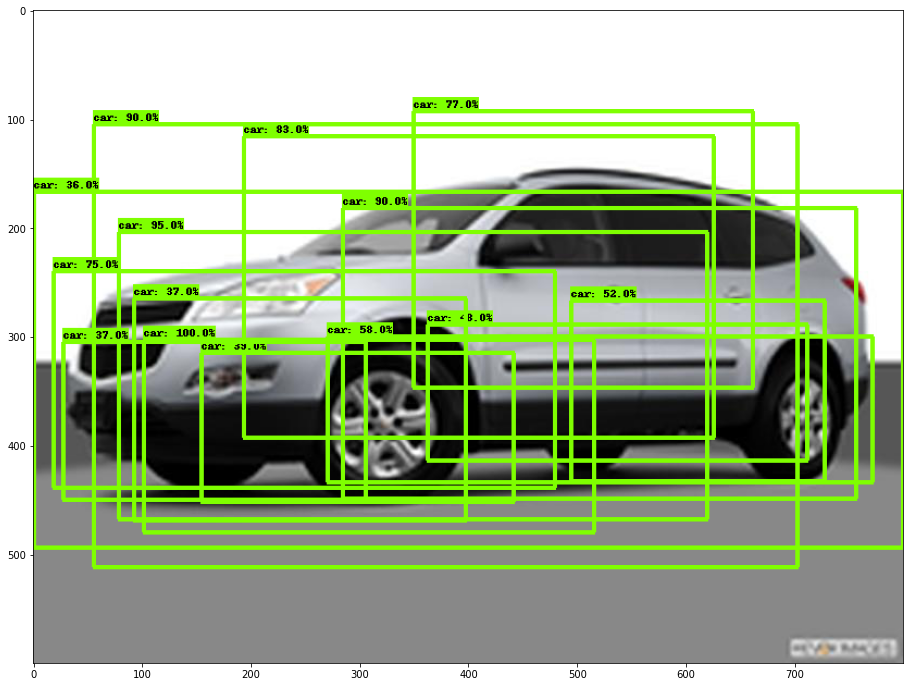

In [ ]:
%matplotlib inline

PATH_TO_MODEL = "/content/training_demo/training/output_inference_graph_v1.pb/frozen_inference_graph.pb"
PATH_TO_LABELS = "/content/training_demo/annotations/label_map.pbtxt"

PATH_TO_IMAGE = "/content/training_demo/images/test/00010.jpg"

NUM_CLASSES = 1

# Load a model
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_MODEL, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Load labels
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:

      image = Image.open(PATH_TO_IMAGE)
      
      # Convert image to numpy array
      (im_width, im_height) = image.size    
      image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)      
    
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      # Extract image tensor
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      
      # Extract detection boxes
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      
      # Extract detection scores
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      
      # Extract detection classes
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      
      # Extract number of detectionsd
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
     
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=4,
          min_score_thresh = 0.3
          )
     
      IMAGE_SIZE = (18, 12)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)  

Далее конвертируем в модель совместимую с tflite_convert. 
Параметры такие же как и в export_inference_graph.py выше.


In [ ]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py --pipeline_config_path /content/training_demo/training/ssdlite_mobilenet_v2_coco.config --trained_checkpoint_prefix /content/training_demo/training/model.ckpt-11252 --output_directory /content/training_demo/training/output_inference_graph_tf_lite_v1.pb

Instructions for updating:
Please use `layer.__call__` method instead.
W1003 01:41:39.559293 140237885048704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:41:41.608940 140237885048704 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:41:41.636768 140237885048704 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1003 01:41:41.664447 140237885048704 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

Конвертируем модель в формат tflite:

In [27]:
!tflite_convert --output_file=/content/training_demo/training/model_q.tflite  --graph_def_file=/content/training_demo/training/output_inference_graph_tf_lite_v1.pb/tflite_graph.pb --input_arrays=normalized_input_image_tensor  --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --input_shapes=1,300,300,3 --enable_select_tf_ops --allow_custom_ops  --inference_input_type=QUANTIZED_UINT8 --inference_type=FLOAT --mean_values=128 --std_dev_values=128

2020-10-03 01:48:24.939675: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-03 01:48:24.944027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-03 01:48:24.944528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-10-03 01:48:24.944761: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-10-03 01:48:24.946449: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-10-03 01:48:24.948062: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-

Архивируем папку с результатами обучения и заливаем её в Google Drive:



In [28]:
!zip -r ./training_demo/training.zip ./training_demo/training/

  adding: training_demo/training/ (stored 0%)
  adding: training_demo/training/model.ckpt-16997.data-00000-of-00001 (deflated 6%)
  adding: training_demo/training/model.ckpt-0.meta (deflated 94%)
  adding: training_demo/training/model.ckpt-16997.index (deflated 72%)
  adding: training_demo/training/model.ckpt-20000.index (deflated 72%)
  adding: training_demo/training/model.ckpt-20000.data-00000-of-00001 (deflated 6%)
  adding: training_demo/training/model.ckpt-16997.meta (deflated 94%)
  adding: training_demo/training/ssdlite_mobilenet_v2_coco.config (deflated 69%)
  adding: training_demo/training/model.ckpt-5528.data-00000-of-00001 (deflated 6%)
  adding: training_demo/training/model.ckpt-11252.data-00000-of-00001 (deflated 6%)
  adding: training_demo/training/checkpoint (deflated 73%)
  adding: training_demo/training/model.ckpt-20000.meta (deflated 94%)
  adding: training_demo/training/output_inference_graph_tf_lite_v1.pb/ (stored 0%)
  adding: training_demo/training/output_inferenc

In [32]:
training_result = drive.CreateFile({'title': 'training_result.zip'})
training_result.SetContentFile('training_demo/training.zip')
#training_result.Upload()

Если возникнет ошибка:
```
InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)
```
нужно повторно авторизоваться

In [30]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)